<a href="https://colab.research.google.com/github/udayabhargavi/Creditcard_fraud_detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("/content/creditcard_2023.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,9201,0.919877,-0.508746,0.907040,-0.141324,0.212172,1.084523,0.217929,-0.097724,2.295117,...,-0.204404,-0.355777,-0.202490,-2.189461,0.715080,-0.804860,-0.181130,-0.045016,18372.93,0.0
9202,9202,0.879119,-0.534332,0.450423,-0.577440,0.240435,0.427988,0.446501,-0.174110,1.451179,...,-0.152626,-0.192915,-0.207315,-0.425161,0.631047,2.164127,-0.380094,-0.134600,5166.55,0.0
9203,9203,0.747443,-0.585769,1.081893,-0.003736,-0.019449,0.545260,0.291497,-0.157407,2.046986,...,-0.087649,0.109813,-0.303974,-0.246806,0.728671,-0.629056,-0.227226,0.027391,7281.67,0.0
9204,9204,-0.029523,-0.095124,1.863366,-0.246077,0.563278,0.414604,0.813811,-0.297455,1.203070,...,-0.153740,0.214909,-0.101501,0.108630,-0.670639,-1.287344,-0.810432,-0.857137,5848.36,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9206 non-null   int64  
 1   V1      9206 non-null   float64
 2   V2      9206 non-null   float64
 3   V3      9206 non-null   float64
 4   V4      9206 non-null   float64
 5   V5      9206 non-null   float64
 6   V6      9206 non-null   float64
 7   V7      9206 non-null   float64
 8   V8      9206 non-null   float64
 9   V9      9206 non-null   float64
 10  V10     9206 non-null   float64
 11  V11     9206 non-null   float64
 12  V12     9206 non-null   float64
 13  V13     9206 non-null   float64
 14  V14     9206 non-null   float64
 15  V15     9206 non-null   float64
 16  V16     9206 non-null   float64
 17  V17     9206 non-null   float64
 18  V18     9206 non-null   float64
 19  V19     9206 non-null   float64
 20  V20     9206 non-null   float64
 21  V21     9206 non-null   float64
 22  

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,...,9206.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000,9205.000000
mean,4602.500000,0.277163,-0.382591,1.150957,-0.627808,0.305285,0.506189,0.458852,-0.161048,1.101975,...,-0.131997,-0.166002,-0.048349,0.175682,0.077997,0.098256,-0.201605,-0.094961,11928.376964,0.003802
std,2657.687623,0.601788,0.527648,0.708519,0.681243,0.677890,0.721071,0.525276,0.242306,0.900133,...,0.345768,0.569939,0.504399,1.108687,0.703345,1.208780,0.474858,0.659281,6930.869771,0.061549
min,0.000000,-2.513872,-20.936274,-1.523758,-3.996094,-4.298320,-18.642598,-3.038728,-4.074350,-1.911040,...,-5.775451,-6.220250,-11.690438,-3.674306,-3.875061,-3.733169,-5.273815,-8.758956,50.530000,0.000000
25%,2301.250000,-0.173069,-0.519461,0.687923,-0.964367,0.029901,0.087610,0.270648,-0.196785,0.504409,...,-0.212674,-0.532876,-0.203259,-0.565507,-0.340028,-0.807233,-0.330264,-0.140629,5944.930000,0.000000
50%,4602.500000,0.036793,-0.344255,1.043292,-0.527499,0.202332,0.375767,0.422693,-0.151428,0.991532,...,-0.155031,-0.179787,-0.073397,0.201104,0.120964,0.088261,-0.239034,-0.058953,11739.200000,0.000000
75%,6903.750000,0.946279,-0.155188,1.572911,-0.175143,0.411050,0.756567,0.618605,-0.088401,1.561312,...,-0.088785,0.182002,0.060483,0.883663,0.516539,0.906322,-0.084696,0.091439,17978.670000,0.000000
max,9205.000000,1.695400,1.654756,4.440555,2.089193,41.540257,9.295606,37.922674,0.890280,12.171681,...,6.827267,4.929620,18.418155,8.395836,10.424231,5.623285,17.987212,11.375357,24035.200000,1.000000


In [8]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df.Class.value_counts()

,count
Class,
0.0,9170
1.0,35


In [11]:
df.Class.unique()

array([ 0.,  1., nan])

In [12]:
fig = px.pie(df, names='Class')
fig.show()

<Axes: xlabel='Class', ylabel='Count'>

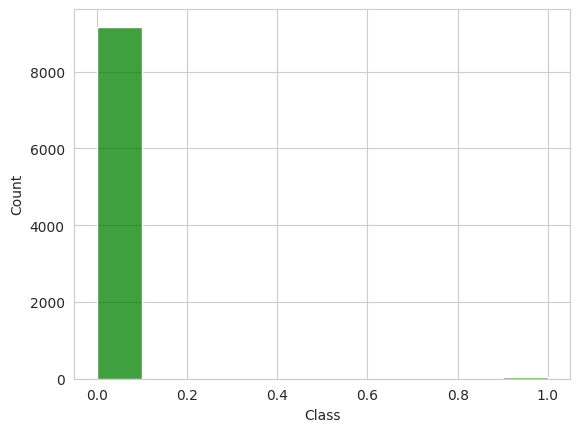

In [13]:
sns.set_style('whitegrid')
sns.histplot(df['Class'],color ='green', bins = 10)

In [14]:
df.dropna(inplace=True)
x = df.drop(columns=["Class"])
y = df["Class"]

In [15]:
x

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,9200,0.489393,-0.692004,0.437987,0.058085,0.165779,0.350741,0.676361,-0.216299,1.387358,...,0.334158,-0.079149,-0.201357,-0.439709,0.142186,0.960358,-0.733602,-0.312308,0.059988,3004.96
9201,9201,0.919877,-0.508746,0.907040,-0.141324,0.212172,1.084523,0.217929,-0.097724,2.295117,...,-0.238446,-0.204404,-0.355777,-0.202490,-2.189461,0.715080,-0.804860,-0.181130,-0.045016,18372.93
9202,9202,0.879119,-0.534332,0.450423,-0.577440,0.240435,0.427988,0.446501,-0.174110,1.451179,...,-0.103969,-0.152626,-0.192915,-0.207315,-0.425161,0.631047,2.164127,-0.380094,-0.134600,5166.55
9203,9203,0.747443,-0.585769,1.081893,-0.003736,-0.019449,0.545260,0.291497,-0.157407,2.046986,...,0.007174,-0.087649,0.109813,-0.303974,-0.246806,0.728671,-0.629056,-0.227226,0.027391,7281.67


In [16]:
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
9200,0.0
9201,0.0
9202,0.0
9203,0.0


In [17]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify=y)

In [19]:
x_train

array([[ 8.26416860e-01, -9.04310457e-01,  5.02907697e-01, ...,
        -3.50595815e-01, -1.84912857e+00, -7.70175533e-03],
       [ 4.61754775e-01,  6.71654799e-01, -1.55435811e+00, ...,
        -5.64135086e-02,  1.72025666e-01,  7.01282025e-02],
       [-9.47218231e-01, -1.27255467e+00,  1.07376977e+00, ...,
         1.42171476e+00,  1.24167406e+00, -1.01357532e+00],
       ...,
       [-1.51283961e-01, -8.62926985e-01, -8.19552953e-01, ...,
        -1.66671367e-01, -2.27567996e-01,  1.35554897e+00],
       [ 1.00667810e+00, -2.31480853e+00,  8.76538037e-01, ...,
        -9.30290228e+00, -9.45884920e+00, -1.15276888e+00],
       [-1.63853325e+00,  1.29182766e+00, -6.54631976e-01, ...,
         1.54406219e-03,  1.26873422e-01,  2.79256174e-01]])

In [20]:
x_test

array([[-1.46278795, -0.75605261,  0.29296698, ..., -0.98888033,
        -0.66776707,  0.76187261],
       [-0.07902893,  0.65539533, -0.29351254, ...,  0.04645417,
         0.30063935,  0.08200759],
       [-1.52902172, -0.65282605,  0.69951292, ..., -0.29107292,
         0.28874214,  1.72443325],
       ...,
       [ 0.39363936, -0.84271121, -0.64646724, ...,  0.12641991,
        -0.32994486, -0.21447636],
       [-1.43983192,  1.21908697, -0.16346847, ..., -0.07562879,
         0.13602888, -1.60473959],
       [-1.21102434, -1.30011797, -0.45937077, ..., -1.10734779,
        -0.62369307,  0.63137397]])

In [21]:
y_train

,Class
6798,0.0
5829,0.0
2085,0.0
2946,0.0
5359,0.0
...,...
2376,0.0
6625,0.0
4200,0.0
7277,0.0


In [22]:
y_test

,Class
715,0.0
4392,0.0
539,0.0
4025,0.0
8879,0.0
...,...
2295,0.0
2450,0.0
5648,0.0
776,0.0


In [23]:
x_train.shape

(6443, 30)

In [24]:
y_train.shape

(6443,)

In [25]:
# prompt: logisticregression without nan values
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
model.score(x_train,y_train)

1.0

In [27]:
model.score(x_test,y_test)

0.999637943519189

In [28]:
y_predict = model.predict(x_test)

In [29]:
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
#PREDICTING THE ACCURACY BY USING LOGISTIC REGRESSION
accuracy=model.score(x_test,y_test)
accuracy

0.999637943519189

In [31]:
print(accuracy_score(y_test, y_predict))

0.999637943519189


In [32]:
#PREDICTING THE ACCURACY BY USING SUPPORT VECTOR MACHINE
model2 = SVC()
model2.fit(x_train, y_train)

SVC()

In [33]:
Y_pred2 = model2.predict(x_test)
print(accuracy_score(y_test, Y_pred2))

0.999275887038378


In [37]:
#PREDICTING THE ACCURACY BY USING RANDOMFOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf_classifier.predict(x_test)

In [47]:
#ACCURACY SCORE BY RANDOMFOREST CLASSIFIER
print(accuracy_score(y_test, y_predict))

0.999637943519189


In [44]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2751
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2762
   macro avg       1.00      0.95      0.98      2762
weighted avg       1.00      1.00      1.00      2762

[[2751    0]
 [   1   10]]


In [45]:
#Testing the data
random_test_data=x_test[0].reshape(1,-1)

In [46]:
prediction=model.predict(random_test_data)
print("Fraudulent" if prediction[0] == 1 else "Non-Fraudulent")

Non-Fraudulent
